In [2]:
import numpy as np
import json
import sys
import os
import mayavi
import h5py
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
rc('font', size=18)

with open('50/setup.json') as f:
    data = json.load(f)

input_path  = "inputs/"
case_list   = data["exec_list"]

# Plot 2 subfigures
## plot 50 data

In [96]:

ca = '50/'
# DTMOF
nn = h5py.File(ca+'MOFNN/visual.h5','r')
phi_init50 = np.transpose(np.array(np.array(nn['visual']['vis01'])[12,:,:]))
phi_nn50 = np.array(nn['visual']['vis02'])[12,:,:]
# BFGS
bfgs = h5py.File(ca+'MOFBFGS/visual.h5','r')
phi_bfgs50 = np.array(bfgs['visual']['vis02'])[12,:,:]
# ELVIRA
elvira = h5py.File(ca+'ELVIRA/visual.h5','r')
phi_elvira50 = np.array(elvira['visual']['vis02'])[12,:,:]

x50,y50 =np.meshgrid((np.arange(50)+0.5)/50.0,(np.arange(50)+0.5)/50.0)


## plot 100 data

In [98]:
ca = '100/'
# DTMOF
nn = h5py.File(ca+'MOFNN/visual.h5','r')
phi_init100 = np.transpose(np.array(nn['visual']['vis01'])[25,:,:])
phi_nn100 = np.array(nn['visual']['vis02'])[25,:,:]
# BFGS
bfgs = h5py.File(ca+'MOFBFGS/visual.h5','r')
phi_bfgs100 = np.array(bfgs['visual']['vis02'])[25,:,:]
# ELVIRA
elvira = h5py.File(ca+'ELVIRA/visual.h5','r')
phi_elvira100 = np.array(elvira['visual']['vis02'])[25,:,:]

x100,y100 = np.meshgrid((np.arange(100)+0.5)/100.0,(np.arange(100)+0.5)/100.0)

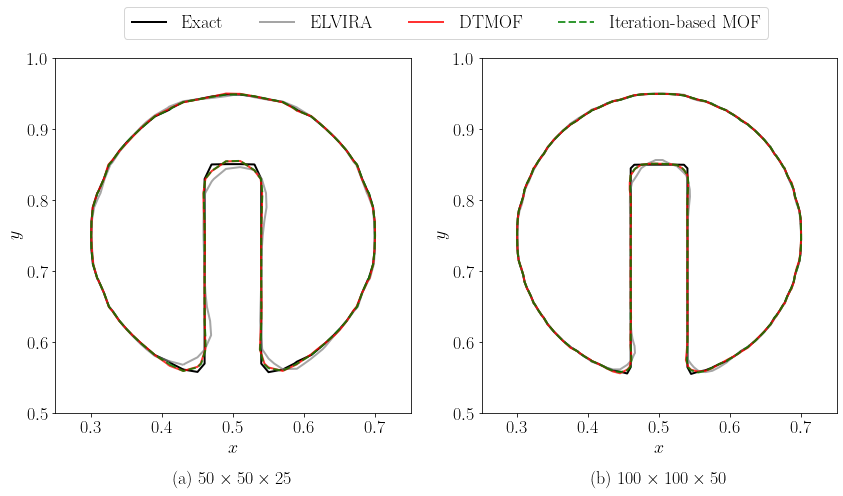

In [100]:
fig = plt.figure(figsize=[14,7])
ax1, ax2 = fig.subplots(1, 2)

ax1.set_aspect(1)
ax2.set_aspect(1)

# plot
cs1 = ax1.contour(x50,y50,phi_init50,levels=[0.5],colors='k',linewidths=2)
cs2 = ax1.contour(x50,y50,np.transpose(phi_elvira50),levels=[0.5],colors='gray',linewidths=2,alpha=0.7)
cs3 = ax1.contour(x50,y50,np.transpose(phi_nn50),levels=[0.5],colors='r',linewidths=2,alpha=0.8)
cs4 = ax1.contour(x50,y50,np.transpose(phi_bfgs50),levels=[0.5],colors='g',linestyles='dashed',linewidths=2,alpha=0.8)

cs1 = ax2.contour(x100,y100,phi_init100,levels=[0.5],colors='k',linewidths=2)
cs2 = ax2.contour(x100,y100,np.transpose(phi_elvira100),levels=[0.5],colors='gray',linewidths=2,alpha=0.7)
cs3 = ax2.contour(x100,y100,np.transpose(phi_nn100),levels=[0.5],colors='r',linewidths=2,alpha=0.8)
cs4 = ax2.contour(x100,y100,np.transpose(phi_bfgs100),levels=[0.5],colors='g',linestyles='dashed',linewidths=2,alpha=0.8)

ax1.set_xbound([0.25,0.75])
ax1.set_ybound([0.5,1])
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.text(0.5, 0.4, r'(a) $50 \times 50 \times 25$',ha='center')

cs1.collections[0].set_label('Exact')
cs2.collections[0].set_label('ELVIRA')
cs3.collections[0].set_label('DTMOF')
cs4.collections[0].set_label('Iteration-based MOF')
ax2.set_xbound([0.25,0.75])
ax2.set_ybound([0.5,1])
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.text(0.5, 0.4, r'(b) $100 \times 100 \times 50$',ha='center')
ax2.legend(ncol=4,bbox_to_anchor=(-0.1, 1.1),loc='center')

plt.savefig('translation_slice.pdf',box_inches='tight')

# Table data

In [112]:
cases = [
    "ELVIRA",
    "MOFBFGS",
    "MOFBFGSNUMERICAL",
    "MOFNN"
]

dat50 = np.zeros([4,4])
ii = 0
for case in cases:
    f=open('50/'+case+'/errors.dat')
    jj = 0
    for line in f:
        dat50[ii,jj] = float(line.split('=')[1])
        jj += 1
    ii += 1
dat100 = np.zeros([4,4])
ii = 0
for case in cases:
    f=open('100/'+case+'/errors.dat')
    jj = 0
    for line in f:
        dat100[ii,jj] = float(line.split('=')[1])
        jj += 1
    ii += 1
dat200 = np.zeros([4,4])
ii = 0
for case in cases:
    f=open('200/'+case+'/errors.dat')
    jj = 0
    for line in f:
        dat200[ii,jj] = float(line.split('=')[1])
        jj += 1
    ii += 1
# print(dat50)
# print(dat100)
d50 = pd.DataFrame(dat50, 
                columns = ['time', 'Ec', 'Eg','mass'],
                index = ['ELVIRA', 'MOF', 'MOF2', 'DTMOF']
            )
d100 = pd.DataFrame(dat100, 
                columns = ['time', 'Ec', 'Eg','mass'],
                index = ['ELVIRA', 'MOF', 'MOF2', 'DTMOF']
            )
d200 = pd.DataFrame(dat100, 
                columns = ['time', 'Ec', 'Eg','mass'],
                index = ['ELVIRA', 'MOF', 'MOF2', 'DTMOF']
            )

In [115]:
d50

,time,Ec,Eg,mass
ELVIRA,187.472157,0.083298,0.004256,5.837990e-15
MOF,19.408642,0.045128,0.002306,7.542398e-13
MOF2,1866.097550,0.045128,0.002306,8.087752e-14
DTMOF,3.235568,0.045105,0.002305,-2.705410e-15


In [116]:
d100

,time,Ec,Eg,mass
ELVIRA,1470.495508,0.036914,0.001885,-2.850072e-16
MOF,140.916880,0.016825,0.000859,2.741770e-13
MOF2,12915.093575,0.016825,0.000859,1.624541e-14
DTMOF,39.592878,0.019037,0.000972,-3.420087e-15


In [117]:
d200

,time,Ec,Eg,mass
ELVIRA,1470.495508,0.036914,0.001885,-2.850072e-16
MOF,140.916880,0.016825,0.000859,2.741770e-13
MOF2,12915.093575,0.016825,0.000859,1.624541e-14
DTMOF,39.592878,0.019037,0.000972,-3.420087e-15
